In [5]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Komoran
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud



import numpy as np
import pandas as pd
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

['Malgun Gothic']


In [6]:
test = pd.read_csv('Project_data/data2/bloter.csv')

In [7]:
test['news_date'].value_counts().sort_index()

news_date
2021.05.09 12:21    1
2021.05.24 19:21    1
2021.05.25 12:57    1
2021.05.25 14:02    1
2021.06.08 11:14    1
                   ..
2023.05.22 16:18    1
2023.05.23 18:25    1
2023.05.24 18:27    1
2023.05.25 19:02    1
2023.05.31 17:48    1
Name: count, Length: 124, dtype: int64

In [8]:
# 새로운 CSV 파일 경로 및 이름
test_file = 'Project_data/data2/bloter.csv'

# 데이터프레임을 새로운 CSV 파일로 저장
test.to_csv(test_file, index=False)

In [9]:
test_df = pd.read_table('Project_data/data2/bloter.csv', sep=',')
test_df

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,news_thumbnail
0,2021.05.09 12:21,"삼성SDS, AI 기반 지능형 컨택센터(AICC) 사업 확대한다",삼성SDS는 인공지능(AI) 기반 지능형 컨택센터인 AICC(AI Contact C...,https://www.bloter.net/news/articleView.html?i...,김주리,"#삼성SDS,#인공지능,#AI,#AICC,#지능형컨텍센터솔루션",https://cdn.bloter.net/news/thumbnail/202105/3...
1,2021.05.24 19:21,"120개 시민단체 ""알고리즘이라고 '모르쇠'? AI 법규 마련해야""",“사람들에게 중요한 영향이 미치는 일을 단지 ‘알고리즘’의 일이니 모른다는 무책임한...,https://www.bloter.net/news/articleView.html?i...,김인경,"#AI,#인공지능,#이루다,#스캐터랩,#인공지능법,#챗봇,#초거대AI",https://cdn.bloter.net/news/thumbnail/202105/3...
2,2021.05.25 12:57,"돈 받고 ‘배민’에 허위리뷰 쓴 업자, ‘징역 10개월’",음식점으로부터 대가를 받고 ‘배달의민족’(이하 배민)에 허위 리뷰를 쓴 업자가 실형...,https://www.bloter.net/news/articleView.html?i...,김인경,"#배민,#배달의민족,#우아한형제들,#리뷰,#가짜리뷰,#허위리뷰,#리뷰조작",https://cdn.bloter.net/news/thumbnail/202105/3...
3,2021.05.25 14:02,‘남는 백신’ 27일부터 네이버·카카오로 ‘당일예약’ 된다,오는 27일 오후 1시부터 네이버·카카오톡 앱을 통해 코로나19 ‘잔여백신’을 실시...,https://www.bloter.net/news/articleView.html?i...,김인경,"#백신,#AZ백신,#AZ,#아스트라제네카,#코로나19,#코로나,#카카오,#네이버,#...",https://cdn.bloter.net/news/thumbnail/202105/3...
4,2021.06.08 11:14,"“뉴스를 이메일로” 뉴닉, 25억 규모 시리즈A 투자 유치",“우리가 시간이 없지 세상이 안 궁금하냐!” 뉴닉(NEWNEEK)이 카카오벤처스 신...,https://www.bloter.net/news/articleView.html?i...,김인경,"#뉴닉,#미디어스타트업,#뉴미디어",https://cdn.bloter.net/news/thumbnail/202106/4...
...,...,...,...,...,...,...,...
119,2023.05.22 16:18,"네이버·카카오, '뉴스제평위' 잠정 중단…새 제휴 모델 찾는다",네이버·카카오가 언론사의 뉴스 제휴 평가 시스템 개선 방안을 모색하기 위해 '뉴스제...,https://www.bloter.net/news/articleView.html?i...,정병연 기자,"#네이버,#카카오,#뉴스,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
120,2023.05.23 18:25,"네이버·카카오 '뉴스제평위 중단'에 뿔난 인터넷신문…""심사 재개 일정 공개하라""",네이버와 카카오가 최근 뉴스제휴 심사를 무기한 중단한 가운데 인터넷신문들이 뉴스제휴...,https://www.bloter.net/news/articleView.html?i...,박현준 기자,"#네이버,#카카오,#뉴스제휴평가위원회",https://cdn.bloter.net/news/thumbnail/202305/6...
121,2023.05.24 18:27,지그재그도 앱 밖으로 나왔다…팝업 스토어 운영 차별점은?,카카오스타일의 스타일 커머스 플랫폼 지그재그가 애플리케이션에서 나와 더현대 서울에 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#패션플랫폼,#커머스,#지그재그,#카카오스타일,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...
122,2023.05.25 19:02,"지그재그 팝업 스토어, '백문이 불여일견' [현장+]",기자는 끊을 수 없을 만큼 인터넷 쇼핑에 길들여졌다. 하지만 취재나 여가를 즐기며 ...,https://www.bloter.net/news/articleView.html?i...,안신혜 기자,"#카카오스타일,#지그재그,#온라인플랫폼,#패션플랫폼,#더현대서울,#팝업스토어",https://cdn.bloter.net/news/thumbnail/202305/6...


In [10]:
okt = Okt()

In [11]:
data = pd.read_csv('Project_data/data2/bloter.csv', encoding='UTF-8')
data = data['news_title'][:15]
data = data.to_list()
data = ' ' .join(data)

In [12]:
noun_data = okt.nouns(data)

In [10]:
count_noun_data = Counter(noun_data)
filtered_count_noun_data = {word: count for word, count in count_noun_data.items() if count >= 2}

In [13]:
from datetime import datetime

# 데이터프레임에서 '제목' 열의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(test_df['news_title'])

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 텍스트 토큰화 및 형태소 분석
tokens = word_tokenize(text)
pos_tags = komoran.pos(text)

# 불용어 파일 읽기
stop_words = []
with open('Project_data/data/불용.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 단어 등장 횟수를 저장할 딕셔너리 초기화
word_counts = {}


for text, date in zip(test_df['news_title'], test_df['news_date']):
    # 텍스트 토큰화 및 형태소 분석
    tokens = word_tokenize(text)
    pos_tags = komoran.pos(text)
    
    # 날짜 문자열을 datetime 객체로 변환
    datetime_obj = datetime.strptime(date, "%Y.%m.%d %H:%M")
    
    # 년도, 월, 일 추출
    year = str(datetime_obj.year)
    month = str(datetime_obj.month).zfill(2)  # 한 자리 월을 두 자리로 맞춤
    day = str(datetime_obj.day).zfill(2)  # 한 자리 일을 두 자리로 맞춤
    
    # 날짜를 합친 형식으로 표시
    full_date = f"{year}-{month}-{day}"
    
    # 불용어 제거 및 명사 추출
    filtered_tokens = [token for token in tokens if token not in stop_words]
    nouns = [token for token, pos in pos_tags if pos.startswith('N')]
    
    # 하루에 하나의 태그만 추출
    if full_date in word_counts:
        continue
    else:
        word_counts[full_date] = nouns
        
# 가장 많이 언급된 단어 추출
top_words_limit = 1
top_words = []
for date, words in word_counts.items():
    word_count = {}
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1
    
    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    
    # 상위 단어 추출
    if sorted_words:
        top_word = sorted_words[0][0]
        top_words.append((date, top_word))

# 추출된 단어를 데이터프레임으로 변환
result_df = pd.DataFrame(top_words, columns=['Date', 'Tag'])

# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('추출된_태그4.csv', index=False)

print(result_df)

           Date     Tag
0    2021-05-09   삼성SDS
1    2021-05-24       개
2    2021-05-25       돈
3    2021-06-08      뉴스
4    2021-07-12      상승
..          ...     ...
97   2023-05-22     네이버
98   2023-05-23     네이버
99   2023-05-24    지그재그
100  2023-05-25    지그재그
101  2023-05-31  커넥티드카,

[102 rows x 2 columns]


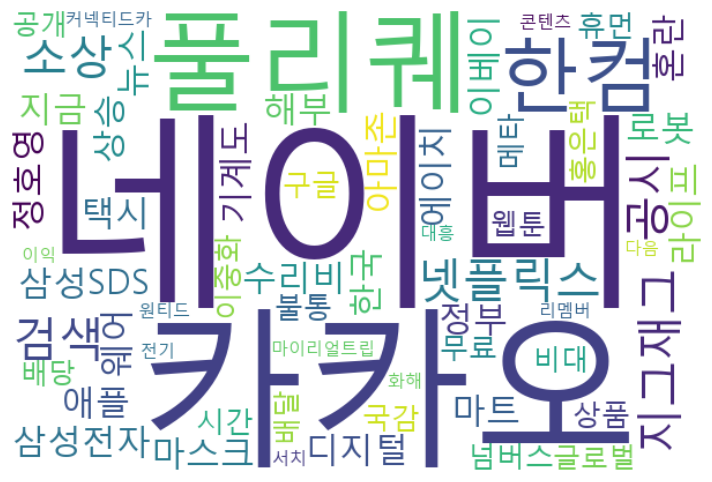

In [14]:
import re

# 폰트 설정
# font_prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# 폰트 사이즈 설정
plt.rcParams['font.size'] = 12

# CSV 파일 불러오기
dataframe = pd.read_csv('추출된_태그4.csv')

# 텍스트 데이터 추출 및 전처리
text_data = ' '.join(dataframe['Tag'])
# 2글자 이상의 단어만 추출
text_data = ' '.join(re.findall(r'\b\w{2,}\b', text_data))

# 워드클라우드 생성
wordcloud = WordCloud(width=600, height=400, font_path='Project_data/data/malgun.ttf',background_color='white').generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# plt.savefig('test.png')